In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

url = 'https://raw.githubusercontent.com/klaytoncastro/idp-storytelling/master/clustering/mall_customers.csv'
arquivo = pd.read_csv(url)
arquivo.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
print(arquivo['Gender'].value_counts(normalize=True) * 100)

Gender
Female    56.0
Male      44.0
Name: proportion, dtype: float64


In [ ]:
# X[:10] #Exibe variáveis no formato Numpy

arquivo = arquivo.drop(['CustomerID'], axis=1)
arquivo.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
 arquivo['Gender'] = arquivo['Gender'].replace('Male', 0)
 arquivo['Gender'] = arquivo['Gender'].replace('Female', 1)

In [ ]:
# Normalizando os dados
#scaler = StandardScaler()
#df_scaled = scaler.fit_transform(arquivo)

In [ ]:
# Reduzindo a dimensionalidade para visualização
#pca = PCA(n_components=2)
#df_pca = pca.fit_transform(df_scaled)

In [ ]:
# Método do Cotovelo (k-Elbow)
no_clusters=[]
j=[]

for i in range(1,10):
    model=KMeans(n_clusters=i, n_init=1)
    model.fit(arquivo)
    no_clusters.append(i)
    j.append(model.inertia_)

In [ ]:
pd.DataFrame(no_clusters,j)

,0
308862.060000,1
225229.612206,2
143391.592360,3
105299.987422,4
75542.773715,5
58350.654495,6
54696.820310,7
45474.045445,8
44718.555419,9


Text(0, 0.5, 'j')

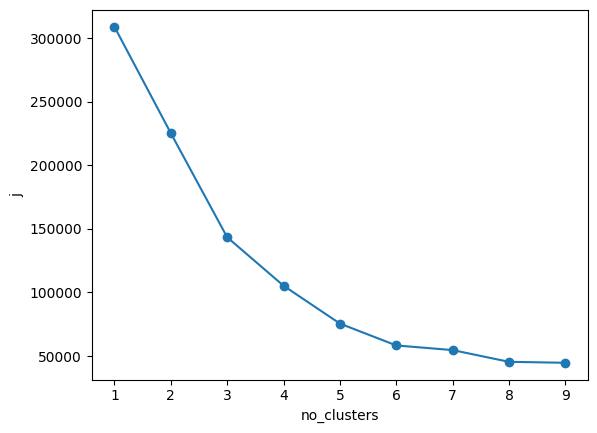

In [ ]:
plt.plot(no_clusters,j,marker='o')
plt.xlabel('no_clusters')
plt.ylabel('j')

In [ ]:
# Aplicando o K-means
model=KMeans(n_clusters=5, n_init=10)
model.fit(arquivo)
pre=model.predict(arquivo)

In [ ]:

# kmeans = KMeans(n_clusters=5, random_state=7, n_init=10)
# kmeans.fit(df_pca)
# labels = kmeans.labels_

In [ ]:
# Plotando os resultados
#plt.figure(figsize=(8, 6))
#scatter = plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
#plt.title('Clusterização de Clientes do Shopping com K-means')
#plt.xlabel('Componente Principal 1')
#plt.ylabel('Componente Principal 2')
#plt.colorbar(scatter)
#plt.show()

In [ ]:
arquivo['KMeans']=pre

In [ ]:
group1=arquivo[arquivo['KMeans']==0]
group2=arquivo[arquivo['KMeans']==1]
group3=arquivo[arquivo['KMeans']==2]
group4=arquivo[arquivo['KMeans']==3]
group5=arquivo[arquivo['KMeans']==4]

In [ ]:
arquivo.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),KMeans
0,0,19,15,39,3
1,0,21,15,81,1
2,1,20,16,6,3
3,1,23,16,77,1
4,1,31,17,40,3


Text(0, 0.5, 'Spending Score')

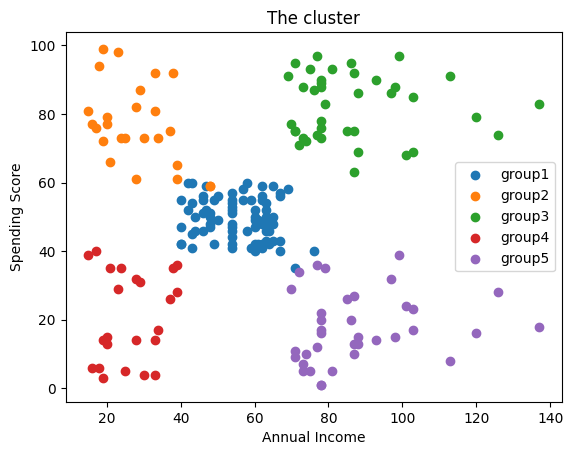

In [ ]:
plt.scatter(group1['Annual Income (k$)'],group1['Spending Score (1-100)'],label='group1')
plt.scatter(group2['Annual Income (k$)'],group2['Spending Score (1-100)'],label='group2')
plt.scatter(group3['Annual Income (k$)'],group3['Spending Score (1-100)'],label='group3')
plt.scatter(group4['Annual Income (k$)'],group4['Spending Score (1-100)'],label='group4')
plt.scatter(group5['Annual Income (k$)'],group5['Spending Score (1-100)'],label='group5')
plt.legend()
plt.title('The cluster')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

<Axes: xlabel='KMeans', ylabel='count'>

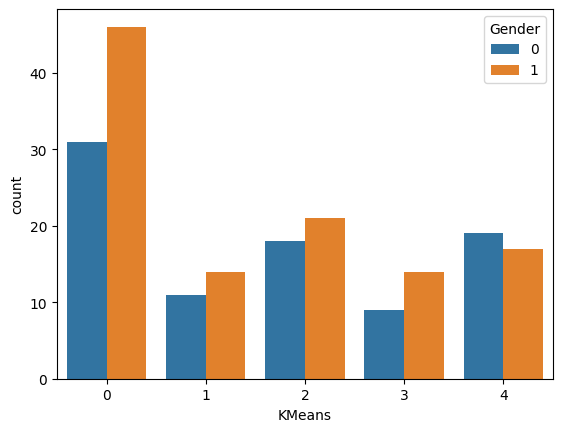

In [ ]:
sns.countplot(arquivo,x='KMeans',hue='Gender')

<Axes: ylabel='count'>

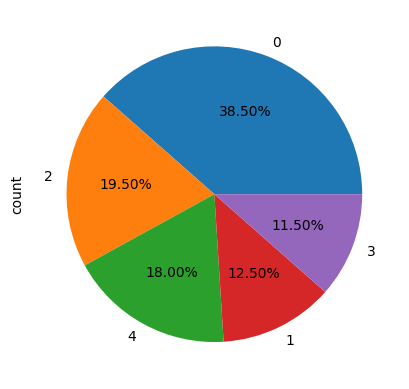

In [ ]:
arquivo['KMeans'].value_counts().plot.pie(autopct='%0.2f%%')

<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

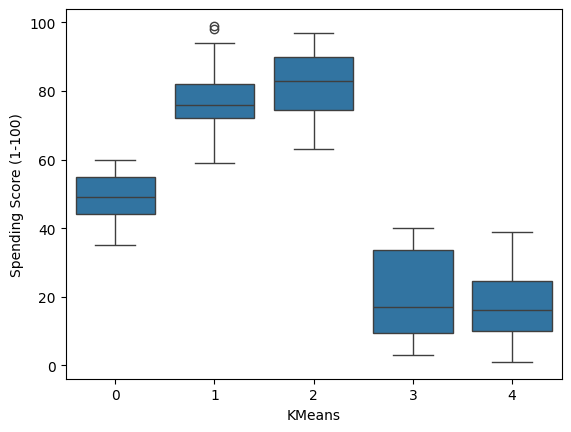

In [ ]:
sns.boxplot(data=arquivo,x='KMeans',y='Spending Score (1-100)')

<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

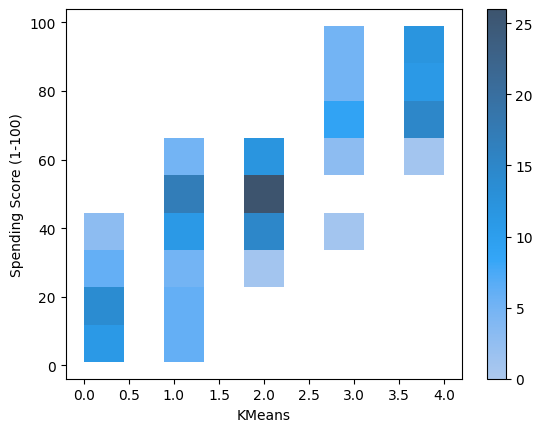

In [ ]:
sns.histplot(arquivo,x='KMeans',y='Spending Score (1-100)',cbar=True)

<Axes: xlabel='KMeans', ylabel='Spending Score (1-100)'>

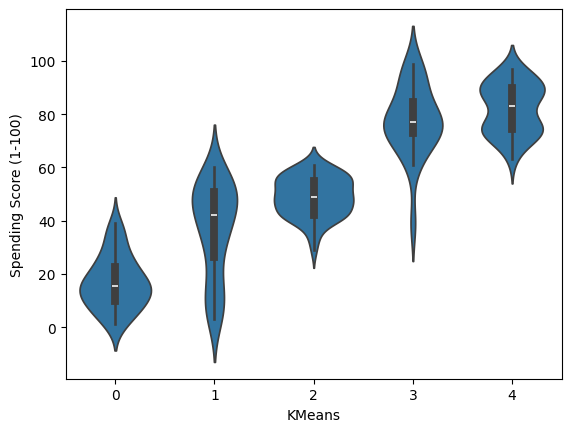

In [ ]:
sns.violinplot(data=arquivo, x="KMeans", y="Spending Score (1-100)")